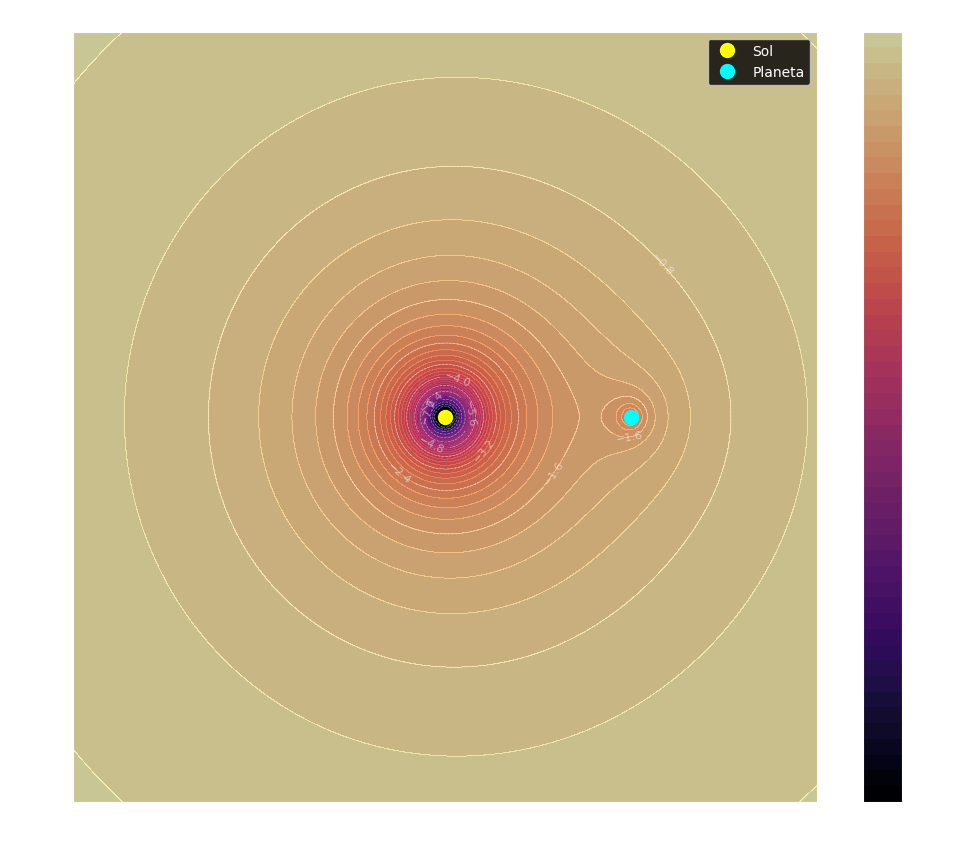

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_potencial():
    # 1. Definir el escenario (Malla de 200x200 puntos)
    x = np.linspace(-2, 2, 200)
    y = np.linspace(-2, 2, 200)
    X, Y = np.meshgrid(x, y)
    
    # 2. Definir masas (Sol y un Júpiter masivo para forzar Lagrange)
    # Posiciones: [x, y], Masas: m
    cuerpos = [
        {'pos': [0, 0], 'm': 1.0, 'color': 'yellow', 'n': 'Sol'},
        {'pos': [1, 0], 'm': 0.1, 'color': 'cyan', 'n': 'Planeta'} # 10% de la masa del sol
    ]
    
    Z = np.zeros_like(X)
    
    # 3. Calcular el potencial gravitatorio en cada punto: U = -G * M / r
    for c in cuerpos:
        r = np.sqrt((X - c['pos'][0])**2 + (Y - c['pos'][1])**2)
        # Añadimos un pequeño "softening" para evitar el infinito en el centro
        Z -= c['m'] / (r + 0.05)
    
    # Limitar el pozo para que la gráfica se vea bien
    Z = np.clip(Z, -10, 0)
    
    # 4. Graficar el "Paisaje Gravitatorio"
    plt.figure(figsize=(12, 10))
    plt.style.use('dark_background')
    
    # Mapa de calor (Pozo de gravedad)
    cp = plt.contourf(X, Y, Z, levels=50, cmap='magma', alpha=0.8)
    plt.colorbar(cp, label="Potencial Gravitatorio (Energía)")
    
    # Dibujar curvas de nivel (Aquí se ven los Puntos de Lagrange)
    contours = plt.contour(X, Y, Z, levels=15, colors='white', linewidths=0.5, alpha=0.5)
    plt.clabel(contours, inline=True, fontsize=8)
    
    # Dibujar los cuerpos
    for c in cuerpos:
        plt.plot(c['pos'][0], c['pos'][1], 'o', color=c['color'], markersize=10, label=c['n'])
        
    plt.title("Mapa de Potencial: Identificando Puntos de Lagrange")
    plt.xlabel("Distancia (AU)")
    plt.ylabel("Distancia (AU)")
    plt.legend()
    plt.show()

calcular_potencial()

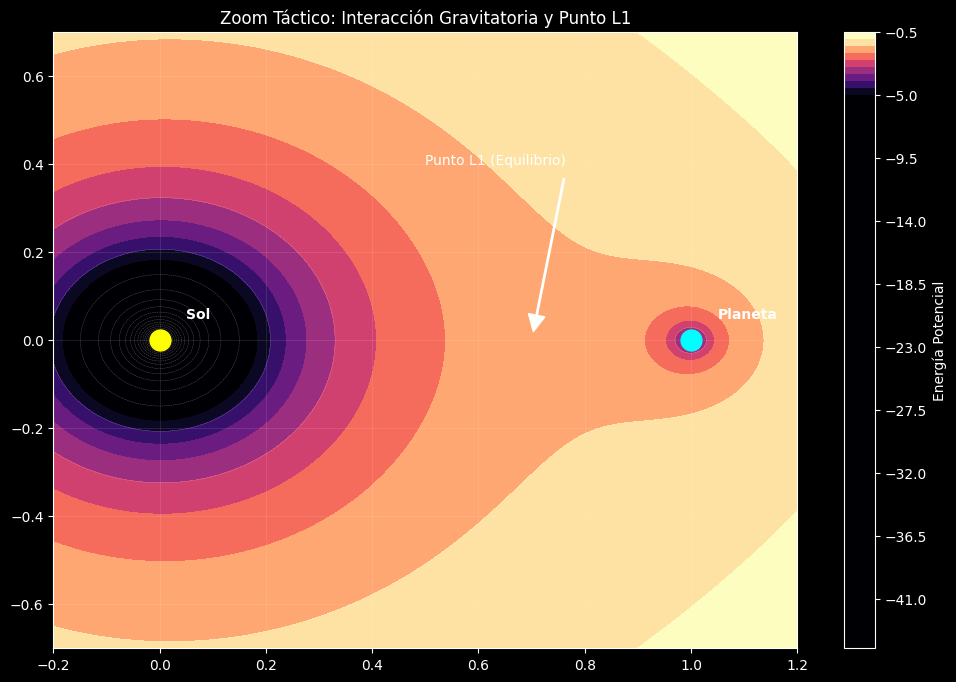

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def mapa_gravedad_zoom(x_range=(-0.2, 1.2), y_range=(-0.7, 0.7), resolucion=300):
    # 1. Creamos la malla con mayor resolución para el zoom
    x = np.linspace(x_range[0], x_range[1], resolucion)
    y = np.linspace(y_range[0], y_range[1], resolucion)
    X, Y = np.meshgrid(x, y)
    
    # 2. Definimos los cuerpos (Igual que antes)
    cuerpos = [
        {'pos': [0, 0], 'm': 1.0, 'color': 'yellow', 'n': 'Sol'},
        {'pos': [1, 0], 'm': 0.1, 'color': 'cyan', 'n': 'Planeta'}
    ]
    
    Z = np.zeros_like(X)
    for c in cuerpos:
        r = np.sqrt((X - c['pos'][0])**2 + (Y - c['pos'][1])**2)
        Z -= c['m'] / (r + 0.02) # Softening más pequeño para ver más detalle
    
    # 3. Graficamos
    plt.figure(figsize=(12, 8))
    plt.style.use('dark_background')
    
    # El mapa de calor con límites de color ajustados para resaltar L1
    cp = plt.contourf(X, Y, Z, levels=100, cmap='magma', vmin=-5, vmax=-1)
    plt.colorbar(cp, label="Energía Potencial")
    
    # Curvas de nivel más finas
    cont = plt.contour(X, Y, Z, levels=30, colors='white', linewidths=0.3, alpha=0.4)
    
    # Marcar los cuerpos
    for c in cuerpos:
        plt.plot(c['pos'][0], c['pos'][1], 'o', color=c['color'], markersize=15)
        plt.text(c['pos'][0]+0.05, c['pos'][1]+0.05, c['n'], color='white', fontweight='bold')

    # --- IDENTIFICACIÓN VISUAL DE L1 ---
    # L1 está donde las curvas de nivel se "besan" entre los dos cuerpos
    plt.annotate('Punto L1 (Equilibrio)', xy=(0.7, 0), xytext=(0.5, 0.4),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1))

    plt.title(f"Zoom Táctico: Interacción Gravitatoria y Punto L1")
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.grid(alpha=0.1)
    plt.show()

# Ejecutamos el zoom
mapa_gravedad_zoom()

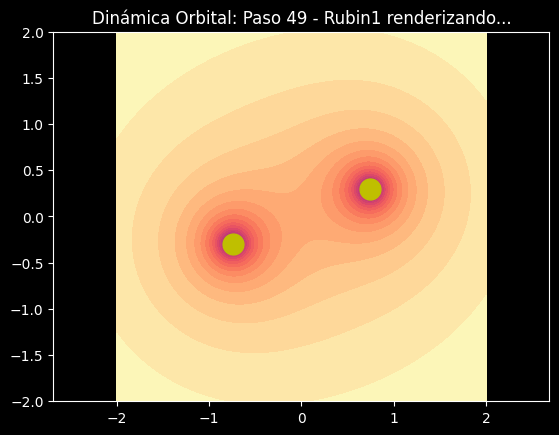

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def animar_caos_gravitatorio(pasos=50):
    # 1. Configuración de la malla
    res = 200 # Resolución (baja para que la animación sea fluida)
    x = np.linspace(-2, 2, res)
    y = np.linspace(-2, 2, res)
    X, Y = np.meshgrid(x, y)
    
    # 2. Parámetros orbitales
    # Dos estrellas de igual masa orbitando el centro
    distancia = 0.8
    omega = 0.2 # Velocidad de rotación
    
    plt.figure(figsize=(10, 8))
    
    for t in range(pasos):
        # Posiciones que cambian con el tiempo (Círculos)
        x1, y1 = distancia * np.cos(omega * t), distancia * np.sin(omega * t)
        x2, y2 = -x1, -y1 # La otra estrella está al lado opuesto
        
        # 3. Calcular Potencial
        r1 = np.sqrt((X - x1)**2 + (Y - y1)**2)
        r2 = np.sqrt((X - x2)**2 + (Y - y2)**2)
        Z = -(1.0 / (r1 + 0.1) + 1.0 / (r2 + 0.1))
        Z = np.clip(Z, -10, 0) # Limitar profundidad
        
        # 4. Renderizado en tiempo real
        clear_output(wait=True)
        plt.clf()
        plt.style.use('dark_background')
        
        # Mapa de calor
        plt.contourf(X, Y, Z, levels=30, cmap='magma')
        
        # Dibujar estrellas
        plt.plot(x1, y1, 'yo', markersize=15, label='Estrella A')
        plt.plot(x2, y2, 'yo', markersize=15, label='Estrella B')
        
        # Dibujar los puntos de Lagrange L4 y L5 (Triángulos equiláteros)
        # En este sistema dinámico, estos son los puntos más interesantes
        plt.title(f"Dinámica Orbital: Paso {t} - Rubin1 renderizando...")
        plt.axis('equal')
        plt.pause(0.01)
        
    plt.show()

# ¡Encender motores!
animar_caos_gravitatorio()

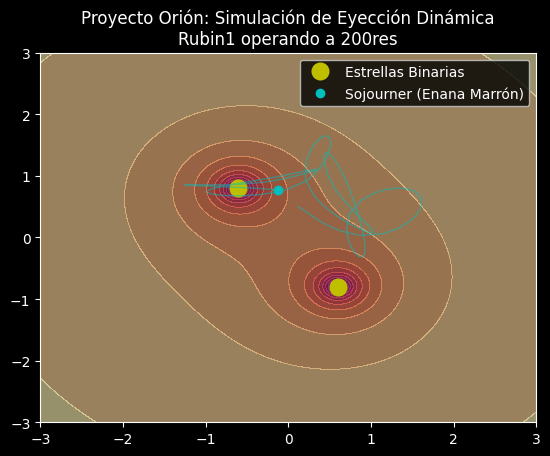

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def simulacion_eyeccion_orion(pasos=150):
    # 1. Configuración de la malla de potencial
    res = 200 
    x_grid = np.linspace(-3, 3, res)
    y_grid = np.linspace(-3, 3, res)
    X, Y = np.meshgrid(x_grid, y_grid)
    
    # 2. Parámetros de las estrellas (Binaria)
    dist = 1.0
    omega = 0.15
    M = 1.0 # Masa de cada estrella
    
    # 3. Estado inicial de Sojourner (Enana Marrón)
    # La ponemos cerca de L1 para maximizar el caos
    pos_p = np.array([0.1, 0.5]) 
    vel_p = np.array([0.2, 0.0])
    dt = 0.1
    
    hist_p = []

    plt.figure(figsize=(10, 10))

    for t in range(pasos):
        # A. Posiciones de las estrellas
        t_f = t * dt
        x1, y1 = dist * np.cos(omega * t_f), dist * np.sin(omega * t_f)
        x2, y2 = -x1, -y1
        
        # B. Calcular Física para Sojourner (Aceleración gravitatoria)
        r1_vec = np.array([x1, y1]) - pos_p
        r2_vec = np.array([x2, y2]) - pos_p
        dist1 = np.linalg.norm(r1_vec)
        dist2 = np.linalg.norm(r2_vec)
        
        # F = G*M/r^2 * vector_unitario
        acc_p = M * r1_vec / (dist1**3 + 0.01) + M * r2_vec / (dist2**3 + 0.01)
        
        # C. Integración de movimiento
        vel_p += acc_p * dt
        pos_p += vel_p * dt
        hist_p.append(pos_p.copy())
        
        # D. Calcular Potencial para el fondo (solo cada 2 pasos para ganar velocidad)
        if t % 2 == 0:
            r1_grid = np.sqrt((X - x1)**2 + (Y - y1)**2)
            r2_grid = np.sqrt((X - x2)**2 + (Y - y2)**2)
            Z = -(M / (r1_grid + 0.1) + M / (r2_grid + 0.1))
            
            # E. Renderizado
            clear_output(wait=True)
            plt.clf()
            plt.style.use('dark_background')
            
            # Dibujar Potencial
            plt.contourf(X, Y, Z, levels=20, cmap='magma', alpha=0.6)
            
            # Dibujar Estrellas
            plt.plot(x1, y1, 'yo', markersize=12, label='Estrellas Binarias')
            plt.plot(x2, y2, 'yo', markersize=12)
            
            # Dibujar Sojourner y su estela
            h = np.array(hist_p)
            plt.plot(h[:,0], h[:,1], 'c-', alpha=0.5, linewidth=1)
            plt.plot(pos_p[0], pos_p[1], 'co', markersize=6, label='Sojourner (Enana Marrón)')
            
            plt.xlim(-3, 3)
            plt.ylim(-3, 3)
            plt.title(f"Proyecto Orión: Simulación de Eyección Dinámica\nRubin1 operando a {res}res")
            plt.legend(loc='upper right')
            plt.pause(0.001)

    plt.show()

simulacion_eyeccion_orion()